In [9]:
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAvgPool2D, Dense, Flatten,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

%matplotlib inline

In [2]:
#def dataframe_creator(path):
#    df=[]
#    clas=[]
#    for cls in os.listdir(path):
#        class_folder=os.path.join(path,cls)
#        for img in os.listdir(class_folder):
#            img_path=os.path.join(class_folder,img)
#            if img_path.endswith(".png"):
#                df.append([img_path,cls])
#    return (pd.DataFrame(df,columns=["filename","class"]))

In [3]:
#df_test=dataframe_creator("RPS/validation")
#df_val=dataframe_creator("RPS/test/")
#df_train,cls=dataframe_creator("RPS/train/")
img_dim=256
cls=sorted(["paper","rock","scissors"])
print(cls)

['paper', 'rock', 'scissors']


In [13]:
train=ImageDataGenerator().flow_from_directory("RPS/train/",target_size=(img_dim,img_dim),classes=cls,)
test=ImageDataGenerator().flow_from_directory("RPS/test/",target_size=(img_dim,img_dim),shuffle=False,classes=cls)
val=ImageDataGenerator().flow_from_directory("RPS/validation/",target_size=(img_dim,img_dim),shuffle=False,classes=cls)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Found 33 images belonging to 3 classes.


In [5]:
print(train.class_indices)

{'paper': 0, 'rock': 1, 'scissors': 2}


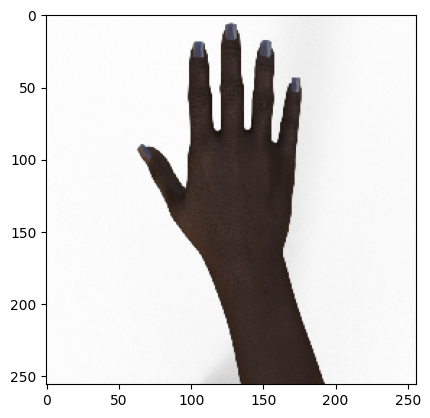

In [6]:
img = val[0][0][0]

plt.imshow(img/255)

In [12]:
model = Sequential()
model.add(Conv2D(8, 5, activation='relu', input_shape=(img_dim, img_dim, 3)))
model.add(Conv2D(8, 5, activation='relu'))
model.add(Conv2D(8, 5, activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(16, 5, activation='relu'))
model.add(Conv2D(16, 5, activation='relu'))
model.add(Conv2D(16, 5, activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(32, 3, activation='relu'))
model.add(Conv2D(32, 3, activation='relu'))
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(Conv2D(64, 3, activation='relu'))
model.add(Conv2D(64, 3, activation='relu', name='final_conv'))
model.add(MaxPool2D(2))
model.add(Flatten())
#model.add(Dense(32, activation='softmax'))
#model.add(Dense(16, activation='softmax'))
#model.add(Dropout(.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

MODEL_PATH = 'models/cnn_model'

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 252, 252, 8)       608       
                                                                 
 conv2d_23 (Conv2D)          (None, 248, 248, 8)       1608      
                                                                 
 conv2d_24 (Conv2D)          (None, 244, 244, 8)       1608      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 122, 122, 8)      0         
 2D)                                                             
                                                                 
 conv2d_25 (Conv2D)          (None, 118, 118, 16)      3216      
                                                                 
 conv2d_26 (Conv2D)          (None, 114, 114, 16)      6416      
                                                      

In [14]:

checkpoint = ModelCheckpoint(MODEL_PATH,
                            save_weights_only=True,
                            save_best_only=True,
                            verbose=1)
history = model.fit(
    train,
    validation_data=test,
    epochs=5,
    callbacks=[checkpoint],
)

Epoch 1/5
79/79 [==============================] - ETA: 0s - loss: 1.2800 - accuracy: 0.6603
Epoch 1: val_loss improved from inf to 0.66104, saving model to models\cnn_model
79/79 [==============================] - 330s 4s/step - loss: 1.2800 - accuracy: 0.6603 - val_loss: 0.6610 - val_accuracy: 0.6989
Epoch 2/5
79/79 [==============================] - ETA: 0s - loss: 0.0593 - accuracy: 0.9861
Epoch 2: val_loss improved from 0.66104 to 0.22320, saving model to models\cnn_model
79/79 [==============================] - 327s 4s/step - loss: 0.0593 - accuracy: 0.9861 - val_loss: 0.2232 - val_accuracy: 0.9194
Epoch 3/5
79/79 [==============================] - ETA: 0s - loss: 9.9630e-04 - accuracy: 1.0000
Epoch 3: val_loss did not improve from 0.22320
79/79 [==============================] - 330s 4s/step - loss: 9.9630e-04 - accuracy: 1.0000 - val_loss: 0.4504 - val_accuracy: 0.9382
Epoch 4/5
79/79 [==============================] - ETA: 0s - loss: 5.6456e-05 - accuracy: 1.0000
Epoch 4: val_

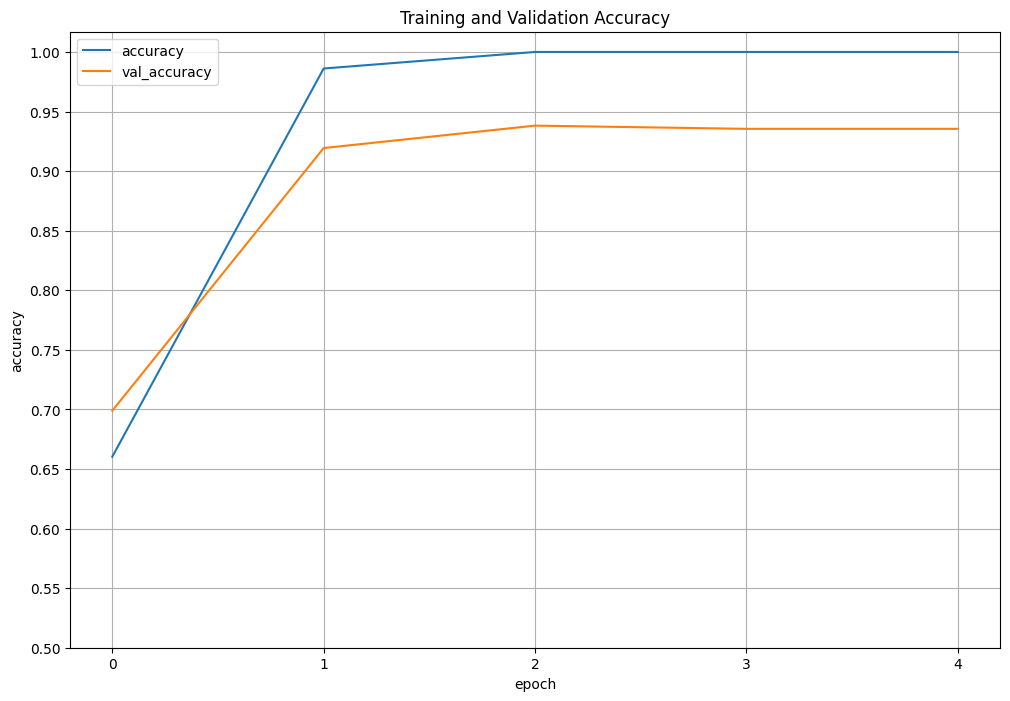

In [15]:
hist_df = pd.DataFrame(history.history)
hist_df.plot(y=['accuracy', 'val_accuracy'], figsize=(12, 8))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy')
plt.grid(axis='both')
plt.xticks(np.arange(0, 5, 1))
plt.yticks(np.arange(0.5, 1.01, 0.05))
plt.show()

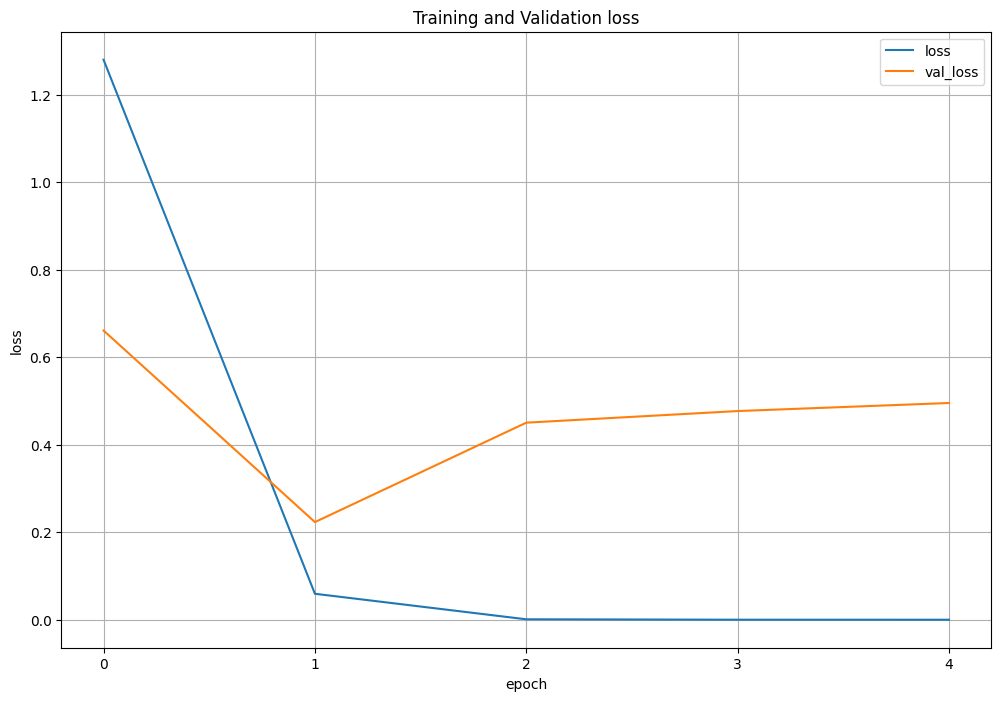

In [16]:
hist_df.plot(y=['loss', 'val_loss'], figsize=(12, 8))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.grid(axis='both')
plt.xticks(np.arange(0, 5, 1))
plt.show()

In [18]:
model.load_weights('models/cnn_model')


In [19]:
model.evaluate(val)

2/2 [==============================] - 1s 34ms/step - loss: 0.4062 - accuracy: 0.8788


[0.406235933303833, 0.8787878751754761]

In [33]:
#def imconver(img_path):
#    img = cv2.imread(img_path)
    #img = img.astype('float32')/255.0
#    cv2.imwrite('img.jpg', img, [int(cv2.IMWRITE_JPEG_QUALITY), 100])


In [37]:
def imread(img_path):
    img = cv2.imread(img_path)
    img = img.astype('float32')/255.0
    img = cv2.resize(img, (img_dim, img_dim))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [58]:
img = imread('rock7.jpg')
x = tf.Variable(np.expand_dims(img, 0), dtype='float32')
y = model.predict(x)[0]


1/1 [==============================] - 0s 37ms/step


In [59]:
print(y)

[0.29368365 0.38100973 0.32530668]


In [64]:
print(cls[np.argmax(y)])

rock


In [69]:
import tensorflow as tf

def saliency_map(img):
    
    plt.imshow(img/255.0)
    plt.show()

    x = tf.Variable(np.expand_dims(img, 0), dtype='float32')

    with tf.GradientTape() as tape:
        result = model(x)
        y = result[:, np.argmax(result)]
        grads = tape.gradient(y, x)

    grads_2d = grads.numpy()[0].max(axis=2)
    grads_2d_norm = (grads_2d - grads_2d.min())/(grads_2d.max() - grads_2d.min())

    grads_2d_uint8 = (grads_2d_norm*255.0).astype('uint8')
    _, grads_2d_bin = cv2.threshold(grads_2d_uint8, 0, 255, cv2.THRESH_OTSU)
    plt.imshow(grads_2d_bin, cmap='gray')
    plt.show()
    print(result)
    print(cls[np.argmax(result)])

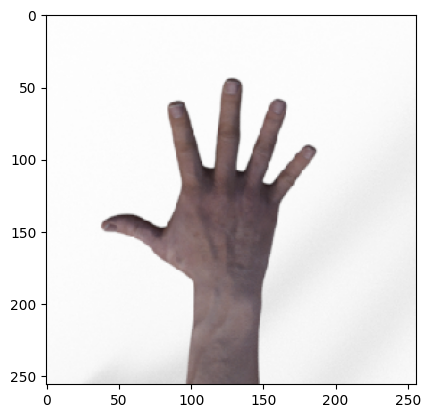

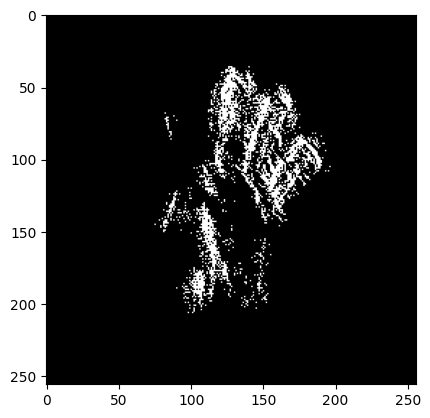

tf.Tensor([[9.9353856e-01 4.8187617e-06 6.4565381e-03]], shape=(1, 3), dtype=float32)
paper


In [70]:
img = val[0][0][4]
saliency_map(img)    